# Reward Function Validation - Progress with Time Penalty

Reward functions can easily get complex to visualize once it starts taking a number of factors into account.  This notebook will help with a quick validation by running it over the track and a number of 

In [10]:
# Load the track to exercise
from math import log
#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


Waypoints shape: (203, 6)
Centerline length: 21.74
Track bounds:  (0.5871459377974991, -3.1185757246211283, 9.349370097060229, 3.0140815800413567)
[4.60918546 1.6430465  4.58646449 1.30659668 4.63079245 1.97884398]
Track width:  0.6737072087508159


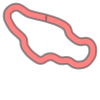

In [11]:

TRACK_NAME = 'Canada_Training'

# Helper functions


# Visualize the Track and Waypoints

# Tracks Available::
# AWS_track                Straight_track                Oval_track
# Bowtie_track             H_track                       reinvent_base
# China_track              Mexico_track                  Canada_training

waypoints = np.load("tracks/%s.npy" % TRACK_NAME)
print("Waypoints shape: {}".format(waypoints.shape))

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(waypoints[:,0:2])
l_inner_border = LineString(waypoints[:,2:4])
l_outer_border = LineString(waypoints[:,4:6])
road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))

# Print some useful track analysis data
print("Centerline length: %0.2f" % l_center_line.length)
print("Track bounds: ", road_poly.bounds)
print(waypoints[0])
print("Track width: ", np.linalg.norm(waypoints[0,4:6] - waypoints[0,2:4]))
#print("Track y min/max: ", pd.DataFrame(outer_border)['y'])
road_poly


Text(4.817766904830933, 1.5820860266685486, '200')

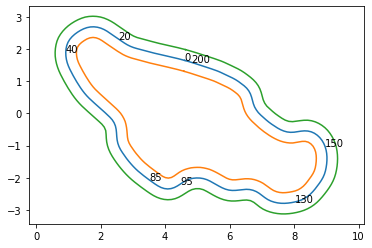

In [12]:
# scan the track and invoke the reward function for each waypoint

# Sections of Canada_Training
plt.plot(center_line[:,0:1], center_line[:,1:2])
plt.plot(inner_border[:,0:1], inner_border[:,1:2])
plt.plot(outer_border[:,0:1], outer_border[:,1:2])
plt.axis('equal')
plt.annotate('0', center_line[0])
# Straight
plt.annotate('20', center_line[20])
# Sharp left
plt.annotate('40', center_line[40])
# Straight
plt.annotate('85', center_line[85])
# Easy left
plt.annotate('95', center_line[95])
# Straight
plt.annotate('130', center_line[130])
# Easy left
plt.annotate('150', center_line[150])
# Straight
plt.annotate('200', center_line[200])

# Reward function code here

In [100]:
"""
AWS DeepRacer reward function using only progress

NOTE: This is great for maximizing individual step rewards, but the 
total episode reward will always be 100.  
"""

array([[ 4.58690814,  1.62381599],
       [ 4.48738106,  1.65427416],
       [ 4.38725046,  1.68433614],
       [ 4.28650273,  1.71406729],
       [ 4.18493776,  1.74356116],
       [ 4.08163985,  1.77406108],
       [ 3.97832333,  1.80508233],
       [ 3.87512443,  1.83662263],
       [ 3.77211047,  1.86872584],
       [ 3.66931665,  1.90142676],
       [ 3.5667727 ,  1.93477735],
       [ 3.46450369,  1.96882859],
       [ 3.36251967,  2.00359792],
       [ 3.26080706,  2.03904586],
       [ 3.15932308,  2.07506231],
       [ 3.05802492,  2.11153893],
       [ 2.95687354,  2.14837789],
       [ 2.85585551,  2.18554509],
       [ 2.75883824,  2.22060616],
       [ 2.66230625,  2.25419253],
       [ 2.56644797,  2.28554876],
       [ 2.47140549,  2.31398797],
       [ 2.37731947,  2.33884628],
       [ 2.28436053,  2.35948844],
       [ 2.19273576,  2.37537617],
       [ 2.10270351,  2.38604352],
       [ 2.01457372,  2.39108769],
       [ 1.92870117,  2.39017183],
       [ 1.8455711 ,  2.38283127],
       [ 1.76540056,  2.36930326],
       [ 1.68843599,  2.34970859],
       [ 1.61491668,  2.3241611 ],
       [ 1.54562711,  2.29200111],
       [ 1.48021793,  2.25434192],
       [ 1.41931891,  2.21083539],
       [ 1.36380989,  2.16101989],
       [ 1.31511767,  2.10415835],
       [ 1.27611324,  2.03901854],
       [ 1.24632892,  1.96765326],
       [ 1.22479791,  1.89173628],
       [ 1.21095609,  1.81227247],
       [ 1.20433386,  1.73001781],
       [ 1.20472823,  1.64551202],
       [ 1.21191166,  1.55924072],
       [ 1.2256072 ,  1.47164742],
       [ 1.24549188,  1.38313076],
       [ 1.27120175,  1.29404115],
       [ 1.30233735,  1.2046781 ],
       [ 1.33847044,  1.11528869],
       [ 1.37915029,  1.02606771],
       [ 1.4239118 ,  0.93715971],
       [ 1.47239061,  0.84867972],
       [ 1.52395403,  0.76066762],
       [ 1.57824537,  0.67316842],
       [ 1.63479949,  0.58618964],
       [ 1.6931722 ,  0.49972327],
       [ 1.7529591 ,  0.41375199],
       [ 1.81381873,  0.32825241],
       [ 1.87554104,  0.24323706],
       [ 1.93603738,  0.15849485],
       [ 1.99578398,  0.07337039],
       [ 2.05473558, -0.01216384],
       [ 2.11286616, -0.09812402],
       [ 2.17012451, -0.18453837],
       [ 2.22650982, -0.27140824],
       [ 2.28208852, -0.35869942],
       [ 2.33699743, -0.44634066],
       [ 2.39133716, -0.53427951],
       [ 2.44519635, -0.62246971],
       [ 2.49858153, -0.71090791],
       [ 2.55315288, -0.80018441],
       [ 2.60840039, -0.88884569],
       [ 2.66457569, -0.97664089],
       [ 2.72193044, -1.06330053],
       [ 2.7807145 , -1.14853223],
       [ 2.84117098, -1.23201811],
       [ 2.9035955 , -1.31333661],
       [ 2.96806472, -1.39226498],
       [ 3.03478235, -1.46838728],
       [ 3.10384421, -1.54135851],
       [ 3.17529632, -1.61084721],
       [ 3.24914195, -1.67653683],
       [ 3.32534623, -1.7381322 ],
       [ 3.40384079, -1.79536844],
       [ 3.48452863, -1.84802159],
       [ 3.56728929, -1.89592025],
       [ 3.65198431, -1.93895751],
       [ 3.73846297, -1.97710206],
       [ 3.82656835, -2.01040731],
       [ 3.91614359, -2.03901717],
       [ 4.00703771, -2.06316761],
       [ 4.09910987, -2.08318352],
       [ 4.19223006, -2.09947197],
       [ 4.28627422, -2.11251339],
       [ 4.38111294, -2.12285416],
       [ 4.47659463, -2.13110561],
       [ 4.57252446, -2.13796276],
       [ 4.66872742, -2.14399834],
       [ 4.77000868, -2.1500424 ],
       [ 4.87130911, -2.15666494],
       [ 4.97263773, -2.16412528],
       [ 5.07400359, -2.17267168],
       [ 5.17541634, -2.18256141],
       [ 5.276882  , -2.19394462],
       [ 5.37840338, -2.20689502],
       [ 5.47997997, -2.22142266],
       [ 5.58160783, -2.23748358],
       [ 5.68327968, -2.25499019],
       [ 5.78498545, -2.27382221],
       [ 5.88671326, -2.29383597],
       [ 5.98845084, -2.31487017],
       [ 6.09018733, -2.33675134],
       [ 6.19191516, -2.35929273],
       [ 6.29362868, -2.38238388],
       [ 6.39532399, -2.4059246 ],
       [ 6.49699807, -2.42983908],
       [ 6.59782498, -2.45315915],
       [ 6.69849498, -2.47569571],
       [ 6.79894984, -2.49704858],
       [ 6.89913314, -2.51677778],
       [ 6.99897986, -2.53439931],
       [ 7.09842452, -2.54951355],
       [ 7.19737634, -2.56170081],
       [ 7.29572336, -2.5705693 ],
       [ 7.39333932, -2.57579568],
       [ 7.49005004, -2.57697023],
       [ 7.58564678, -2.57369543],
       [ 7.67988935, -2.56561554],
       [ 7.77249828, -2.55239836],
       [ 7.86316118, -2.53376514],
       [ 7.9515388 , -2.5095112 ],
       [ 8.03726886, -2.47951198],
       [ 8.11997016, -2.4437251 ],
       [ 8.19924737, -2.40219134],
       [ 8.27469619, -2.35503399],
       [ 8.3459086 , -2.30245627],
       [ 8.41247792, -2.2447372 ],
       [ 8.47400385, -2.18222628],
       [ 8.53009729, -2.11533745],
       [ 8.58038524, -2.04454242],
       [ 8.62451568, -1.97036359],
       [ 8.66216268, -1.89336638],
       [ 8.69303168, -1.81415101],
       [ 8.71686515, -1.73334328],
       [ 8.73344843, -1.65158445],
       [ 8.74261584, -1.56951973],
       [ 8.74425677, -1.48778563],
       [ 8.73832158, -1.40699594],
       [ 8.72482696, -1.32772683],
       [ 8.70386036, -1.25050128],
       [ 8.67558293, -1.17577369],
       [ 8.64023685, -1.10391207],
       [ 8.59852451, -1.03498832],
       [ 8.54979569, -0.96969581],
       [ 8.49515075, -0.90777692],
       [ 8.43520907, -0.84908712],
       [ 8.37033534, -0.79355949],
       [ 8.30107407, -0.74094638],
       [ 8.22800612, -0.69091177],
       [ 8.15174535, -0.64305094],
       [ 8.07294303, -0.59690999],
       [ 7.99227282, -0.55201739],
       [ 7.91043405, -0.50789554],
       [ 7.82183413, -0.45934669],
       [ 7.73385588, -0.40987187],
       [ 7.64675315, -0.35910129],
       [ 7.56075882, -0.30670408],
       [ 7.47607845, -0.25239782],
       [ 7.39287   , -0.19597687],
       [ 7.31123826, -0.1373178 ],
       [ 7.23123156, -0.07638045],
       [ 7.15283838, -0.01320887],
       [ 7.07598551,  0.05206999],
       [ 7.00053998,  0.11925234],
       [ 6.92631822,  0.18807251],
       [ 6.85309405,  0.25821532],
       [ 6.78067486,  0.32941673],
       [ 6.70890695,  0.40146852],
       [ 6.6378418 ,  0.47162292],
       [ 6.56615283,  0.54079899],
       [ 6.49373643,  0.60882247],
       [ 6.42044865,  0.67545007],
       [ 6.34617612,  0.74048232],
       [ 6.27081516,  0.80373199],
       [ 6.19423915,  0.86497245],
       [ 6.1163545 ,  0.92403245],
       [ 6.03709717,  0.98079546],
       [ 5.9564273 ,  1.03519585],
       [ 5.87432458,  1.08721547],
       [ 5.79078409,  1.1368797 ],
       [ 5.70581254,  1.18425258],
       [ 5.61942522,  1.22943081],
       [ 5.53164382,  1.27253724],
       [ 5.44249526,  1.31371417],
       [ 5.35201168,  1.35311694],
       [ 5.26023149,  1.39090822],
       [ 5.16720118,  1.42725323],
       [ 5.07297767,  1.46231616],
       [ 4.97763079,  1.49625767],
       [ 4.88124504,  1.52923333],
       [ 4.78391895,  1.5613916 ],
       [ 4.68575941,  1.59286997],
       [ 4.58690814,  1.62381599]])

# Globals
g_last_progress_value = 0.0

#===============================================================================
#
# REWARD
#
#
# Things that don't work:
#
#  progress_delta / time_delta => leads to exponential rewards as car goes faster
#  progress_delta / progress_total => increased rewards for longer episodes
#
#  progress_delta + 
#===============================================================================

def reward_function(params):
    reward = progress_factor_delta(params) * time_factor_steps(params)
    return float(max(reward, 1e-3)) # make sure we never return exactly zero

def time_factor_steps(params):
    # Discount by number of elapsed steps
    if params['steps'] == 0:
        return 1.0
    else:
        # step 2 discounted 50%
        # desired scale: [1.0,0] over range of [0,200] steps (200 being a ~13s lap)
        #
        # Linear decay function: y = 1 + (1-x)/(200)
        return 1.0 + (1 - params['steps'])/200

def progress_factor_delta(params):
    # Progress range:  0..100
    # Step is roughly a 1/15s timeslice so can account for time-factor
    # Expected real value: [0,~1.0]
    global g_last_progress_value

    # Simple reward for outlier case of first step in the episode
    if params['steps'] == 0:
        reward = 1e-3
    else:
        reward = params['progress'] - g_last_progress_value
    g_last_progress_value = params['progress']
    return reward

def progress_factor_absolute(params):
    return params['progress']

# Test the reward function

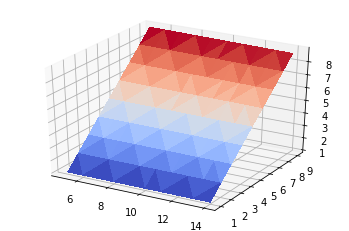

In [175]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

def rewards_for_episode(max_progress, nsteps):
    episode_reward = 0.0
    step_rewards = list()
    for i in range(nsteps+1):
        progress = i * (max_progress / nsteps)
        reward = reward_function({'progress': progress, 'steps': i})
        episode_reward += reward
        step_rewards.append((i, progress, reward, episode_reward))
#    return pd.DataFrame(step_rewards, columns=('step', 'progress', 'reward', 'total_reward'))
    return step_rewards

#rewards_for_episode(10,10).tail(1)['total_reward'].values[0]

# make a plot of rewards
episode_rewards = list()
for progress in range(1,10):
    for steps in range(5,15):
        reward = rewards_for_episode(progress,steps)
        #print(reward)
        episode_rewards.append(reward[-1])

plot_df = pd.DataFrame(episode_rewards, columns=('step', 'progress', 'reward', 'total_reward'))
plot_df.head(50)

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_trisurf(plot_df['step'], plot_df['progress'], plot_df['total_reward'], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()